**Aim :- Deploying Generative Adversarial Network (GAN) for Generating Fake data.**

In [ ]:
# Importing Libraries

import torch # pytorch
from torch import nn
import math
import matplotlib.pyplot as plt


In [ ]:
# Preparing training_data

train_data_length = 1024 # samples
train_data = torch.zeros((train_data_length,2)) # 2 columns initilize with zero
train_data[:,0] = 2*math.pi*torch.rand(train_data_length) # 1 st column rand*3.14*2
train_data[:,1] = torch.sin(train_data[:,0]) # 2 nd column apply sin on 1 st column
train_labels = torch.zeros(train_data_length)


In [ ]:
train_set = [(train_data[i],train_labels[i])for i in range(train_data_length)] # rows 1024
train_set


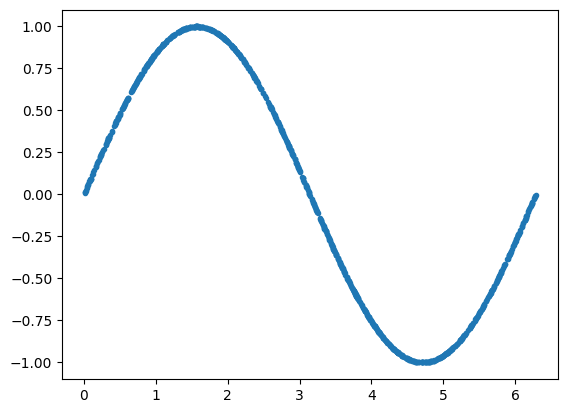

In [ ]:
# Visualizing the data # original data fake graph and original should match

plt.plot(train_data[:,0],train_data[:,1],".") # x and y axis 2 columns

# plt.plot(train_data[:,0],train_data[:,1],".",c='green')
# plt.plot(train_data[:,0],train_data[:,1],"_",c='orange')


In [ ]:
# Creating data loader for batch_wise training

batch_size = 32 # one batch with 32 samples
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size)
train_loader


In [ ]:
# Building Discriminator

class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,256),   # dense in pytorch linear
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Dropout(0.3), # Regularization
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64,1),
        nn.Sigmoid(),
        )

    # Sequential

    def forward(self,x):
      output = self.model(x)
      return output


In [ ]:
# Building Generator

class Generator(nn.Module):
  def __init__(self):
    super().__init__() # super class ko inherit kiya hai

    self.model = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,2),
    )

    # Sequential

  def forward(self,x):
    output = self.model(x)
    return output


In [ ]:
# Creating Objects for Both Classes

discriminator = Discriminator()
generator = Generator()


In [ ]:
# Setting Parameters for training

lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss() # binary cross entropy in pytorch


In [ ]:
# Setting Optimizers

optimizer_d = torch.optim.Adam(discriminator.parameters(),lr=lr)
optimizer_g = torch.optim.Adam(generator.parameters(),lr=lr)


In [ ]:
# Training GAN

for epoch in range(num_epochs):
  for n,(real_samples,_) in enumerate(train_loader):
    real_samples_labels = torch.ones((batch_size,1))
    latent_space_samples = torch.randn((batch_size,2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size,1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training Discriminator

    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_d.step()

    # Generate random noise for training generator

    latent_space_samples = torch.randn((batch_size,2))

    # Training generator

    generator.zero_grad()
    generator_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated,real_samples_labels)

    loss_generator.backward()
    optimizer_g.step()


NotImplementedError: ignored

In [ ]:
# Generating Fake Data & Visualizing

    latent_space_samples = torch.randn(100,2)
    generated_samples = generator(latent_space_samples)
    generated_samples = generated_samples.detach()
    plt.plot(generated_samples[:,0],
             generated_samples[:,1],
             ".")

In [ ]:
# Training GAN

for epoch in range(num_epochs):
  for n, (real_samples,_) in enumerate(train_loader):
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

# Training discriminator

    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_d.step()

# generator random noise for training generator

    latent_space_samples = torch.randn((batch_size, 2))

# Training generator

    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated,real_samples_labels)
    loss_generator.backward()
    optimizer_g.step()







    # Generating fake data & visualising

latent_space_samples = torch.randn(100,2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:,0],generated_samples[:,1],"_")